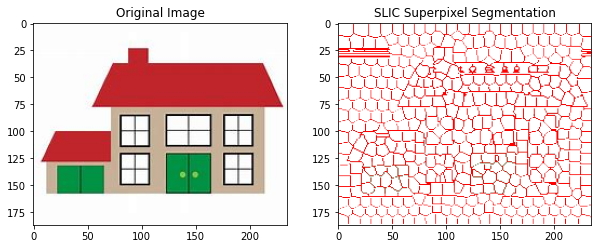

Number of Superpixels: 437


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_slic(image_path, num_segments, compactness):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply SLIC superpixel segmentation
    slic = cv2.ximgproc.createSuperpixelSLIC(image, region_size=10, ruler=10.0)
    slic.iterate()

    # Get the labels and the number of superpixels
    labels = slic.getLabels()
    num_superpixels = slic.getNumberOfSuperpixels()

    # Create a mask to highlight the boundaries
    mask = slic.getLabelContourMask(thick_line=True)

    # Merge the mask with the original image
    segmented_image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    segmented_image[:, :, 3] = 0  # Set alpha channel to 0
    segmented_image[mask > 0] = [255, 0, 0, 255]  # Set boundary pixels to red

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(segmented_image), plt.title('SLIC Superpixel Segmentation')
    plt.show()

    return labels, num_superpixels

# Example usage
image_path = "red.jpg"
num_segments = 200  # Number of desired superpixels
compactness = 10    # Compactness parameter (adjust as needed)

labels, num_superpixels = segment_image_slic(image_path, num_segments, compactness)
print(f"Number of Superpixels: {num_superpixels}")


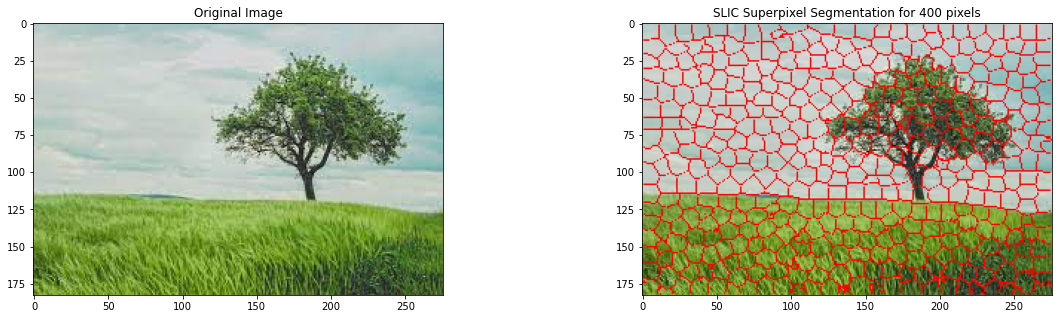

Number of Superpixels: 425


In [4]:
############### SLIC ###########################

import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_slic(image_path, num_segments):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    region_size = int(np.sqrt(image.shape[0] * image.shape[1] / num_segments))
    # Apply SLIC superpixel segmentation
    slic = cv2.ximgproc.createSuperpixelSLIC(image, region_size=region_size, ruler=10)
    slic.iterate(num_iterations=500)

    # Get the labels and the number of superpixels
    labels = slic.getLabels()   
    num_superpixels = slic.getNumberOfSuperpixels()

    # Create a mask to highlight the boundaries
    mask = slic.getLabelContourMask(thick_line=True)

    # Merge the mask with the original image
    # Merge the mask with the original image
    segmented_image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    segmented_image[:, :, 3] = 255 # Set alpha channel to fully opaque
    segmented_image[mask > 0, :3] = [255, 0, 0]  # Set blue channel to 255 for boundary pixels
    #segmented_image2 = cv2.bitwise_and(image,image , mask=mask)

    # Display the original and segmented images side by side
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f'SLIC Superpixel Segmentation for {num_segments} pixels')
    
   

    plt.show()

    return labels, num_superpixels

# Example usage
image_path = "new.jpg"
num_segments = 400  # Number of desired superpixels


labels, num_superpixels = segment_image_slic(image_path, num_segments)
print(f"Number of Superpixels: {num_superpixels}")


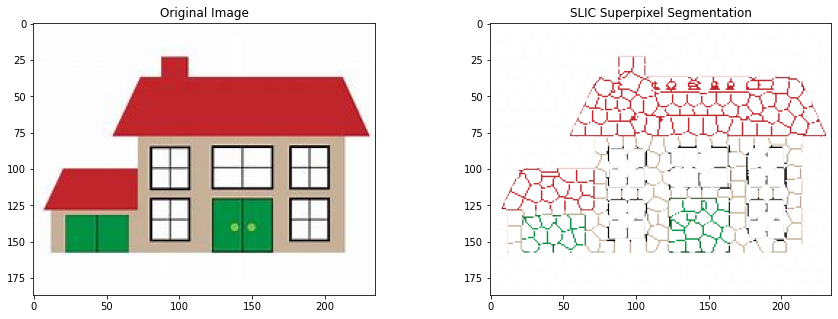

Number of Superpixels: 437


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_slic(image_path, num_segments, compactness):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply SLIC superpixel segmentation
    slic = cv2.ximgproc.createSuperpixelSLIC(image, region_size=10, ruler=10.0)
    slic.iterate()

    # Get the labels and the number of superpixels
    labels = slic.getLabels()
    num_superpixels = slic.getNumberOfSuperpixels()

    # Create a mask to highlight the boundaries
    mask = slic.getLabelContourMask(thick_line=True)

    # Merge the mask with the original image
    segmented_image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    segmented_image[:, :, 3] = 255  # Set alpha channel to 0

    # Set alpha channel to 0 for pixels outside the superpixel boundaries
    segmented_image[mask == 0, 3] = 0

    # Display the original and segmented images side by side
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('SLIC Superpixel Segmentation')
    
    plt.show()

    return labels, num_superpixels

# Example usage
image_path = "red.jpg"
num_segments = 200  # Number of desired superpixels
compactness = 10    # Compactness parameter (adjust as needed)

labels, num_superpixels = segment_image_slic(image_path, num_segments, compactness)
print(f"Number of Superpixels: {num_superpixels}")


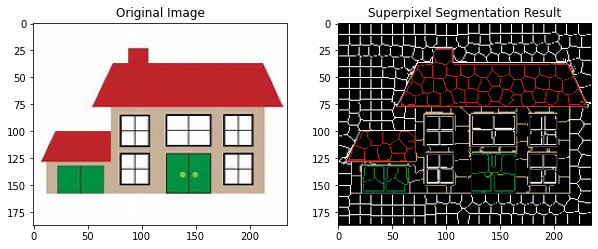

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("red.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to LAB color space (optional but often used in superpixel algorithms)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Create a SLIC object
slic = cv2.ximgproc.createSuperpixelSLIC(image_lab, algorithm=cv2.ximgproc.SLIC, region_size=10)

# Specify the number of superpixels
num_superpixels = 100
slic.iterate(num_superpixels)

# Get the mask of superpixel segments
mask_slic = slic.getLabelContourMask()

# Color the superpixels
result_slic = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_slic)

# Display the original image and the superpixel segmentation result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_slic), plt.title('Superpixel Segmentation Result')
plt.show()